In [1]:
import skimage

In [2]:
#importar una imagen del dataset.
moto=skimage.data.stereo_motorcycle()


In [3]:
#imprimir los datos de la imagenes: tiene tres matrizes, tiene mas culunas que filas.
print(type(moto))
print(moto[0].shape)

<class 'tuple'>
(500, 741, 3)


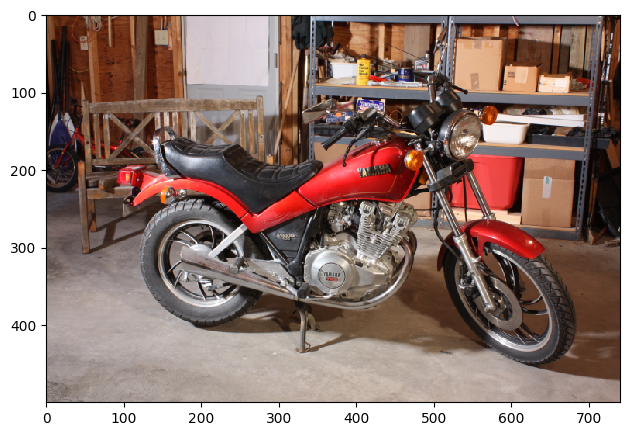

In [4]:
#visualisar imagenes.
skimage.io.imshow(moto[0])
skimage.io.show()

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


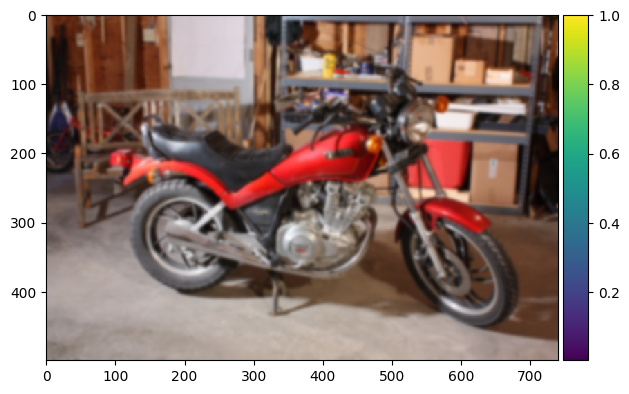

In [5]:
#filtro gaussian.
smoothed_moto=skimage.filters.gaussian(moto[0],sigma=2)
skimage.io.imshow(smoothed_moto)
skimage.io.show()

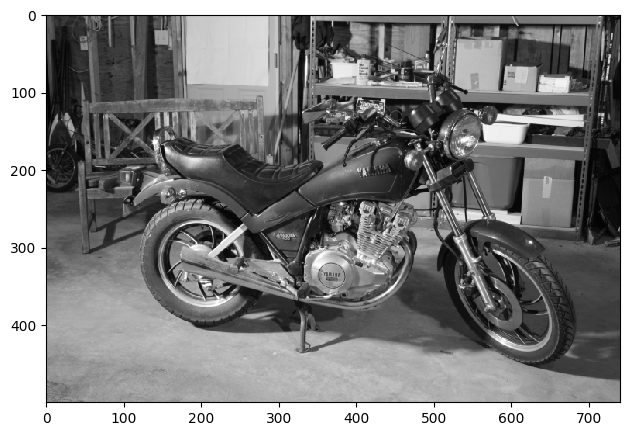

In [6]:
from skimage.color import rgb2gray
#escala en gris.
moto_gray = rgb2gray(moto[0])
skimage.io.imshow(moto_gray)
skimage.io.show()


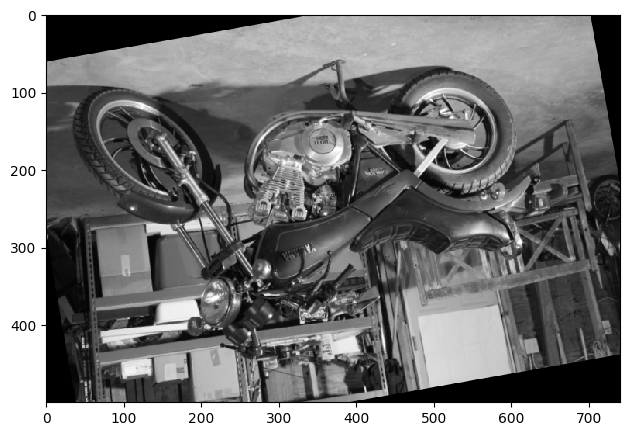

In [7]:
#rotacion.
moto_rotated=skimage.transform.rotate(moto_gray,190)
skimage.io.imshow(moto_rotated)
skimage.io.show()

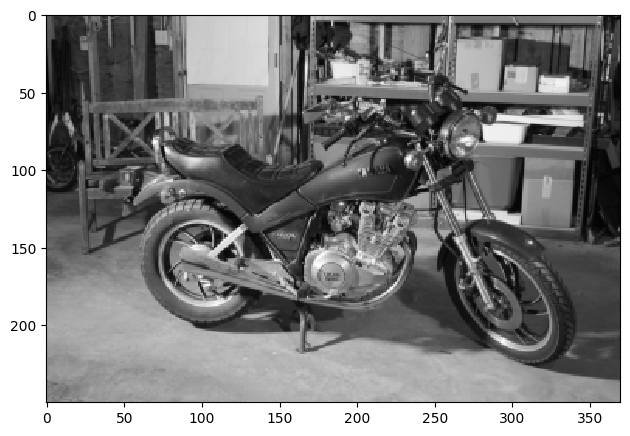

In [8]:
from skimage.transform import rescale, rotate

# Escalar la imagen al 50%
moto_scaled = rescale(moto_gray, scale=0.5 )
skimage.io.imshow(moto_scaled)
skimage.io.show()

<function skimage.io._io.show()>

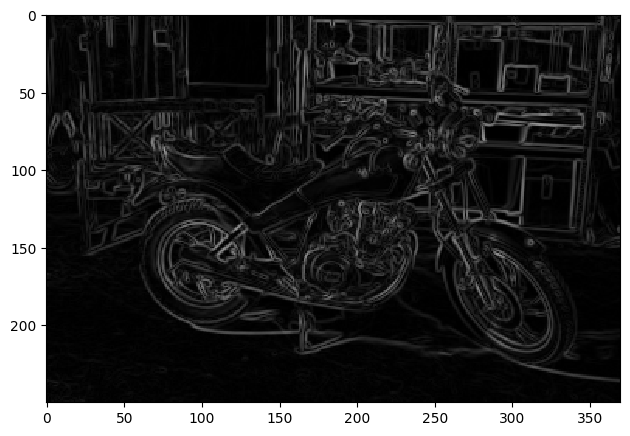

In [9]:
from skimage.filters import sobel
# Aplicar el filtro de Sobel
moto_sobel = sobel(moto_scaled)
skimage.io.imshow(moto_sobel)
skimage.io.show

<function skimage.io._io.show()>

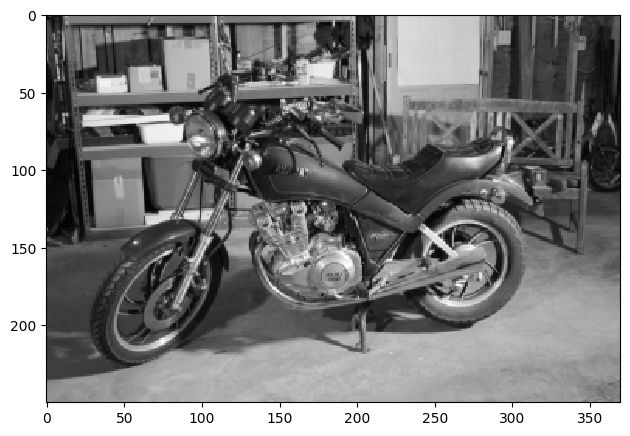

In [10]:
import numpy as np
# Realizar la reflexión horizontal
moto_flipped = np.flip(moto_scaled, axis=1)
skimage.io.imshow(moto_flipped)
skimage.io.show

In [11]:
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square

In [12]:
# Calcular el umbral óptimo usando el método de Otsu
thresh = threshold_otsu(moto_gray)

In [13]:
# Crear una máscara binaria usando el umbral
binary_mask = moto_gray < thresh

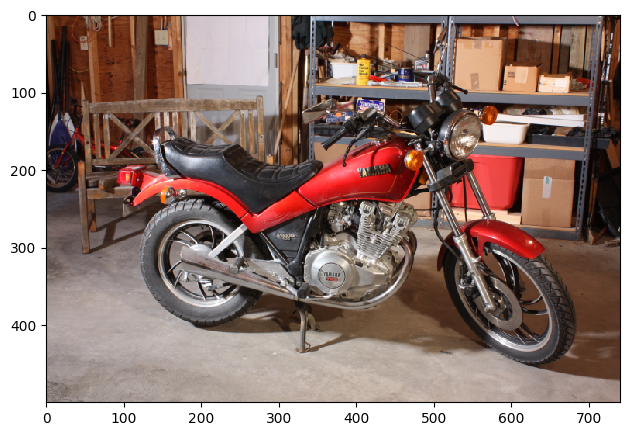

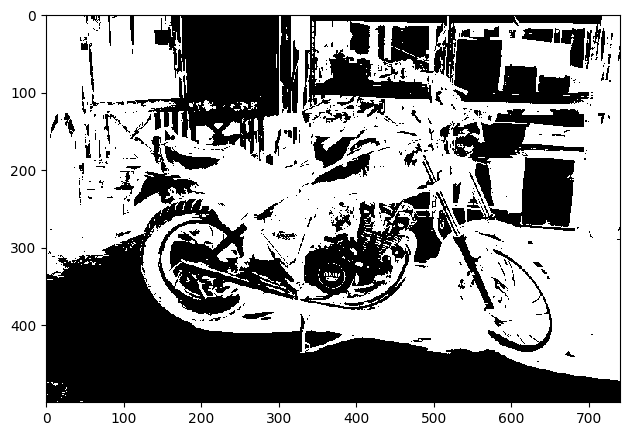

In [14]:
# Mostrar la imagen original y la máscara
skimage.io.imshow(moto[0])
skimage.io.show()
skimage.io.imshow(binary_mask, cmap='gray')
skimage.io.show()

In [15]:
from skimage.filters import threshold_otsu, threshold_local, try_all_threshold
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
import matplotlib.pyplot as plt

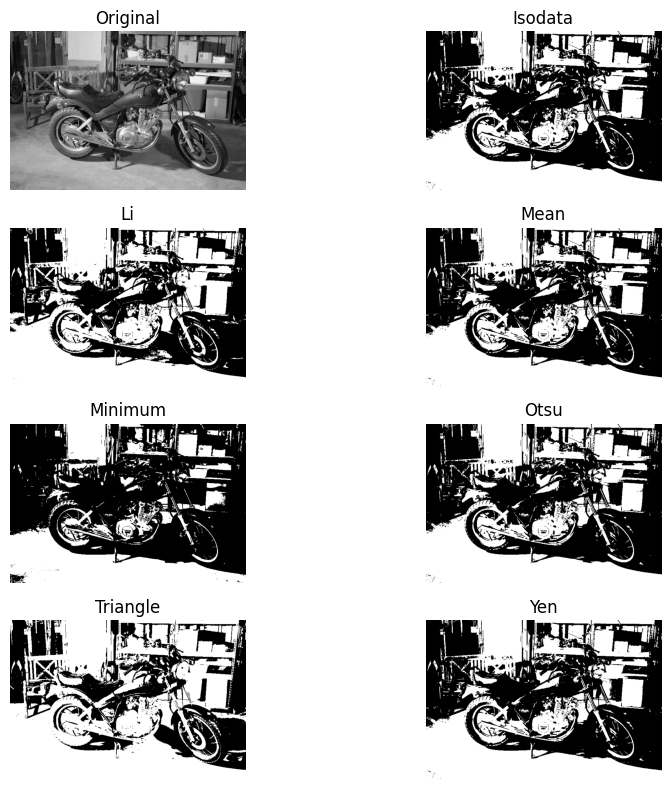

Área del objeto: 370500 píxeles


In [16]:
# Suponiendo que 'moto' es la imagen original a color
moto_gray = rgb2gray(moto[0])

# 1. Probar diferentes métodos de umbral
fig, ax = try_all_threshold(moto_gray, figsize=(10, 8), verbose=False)
plt.show()

# 2. Elegir un método y calcular el umbral
# Ejemplo: umbral local
block_size = 35
thresh_local = threshold_local(moto_gray, block_size, offset=10)
binary_mask_local = moto_gray > thresh_local

# 3. Opcional: aplicar operaciones morfológicas
binary_mask_local = closing(binary_mask_local, square(3))

# 4. Etiquetar los objetos segmentados
label_image = label(binary_mask_local)

# 5. Medir el tamaño de los objetos
regions = regionprops(label_image)
for region in regions:
    print(f"Área del objeto: {region.area} píxeles")

In [22]:
import skimage.io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import erosion, dilation, opening, closing, disk


<class 'numpy.ndarray'>
(300, 451, 3)


<class 'numpy.ndarray'>
(300, 451, 3)


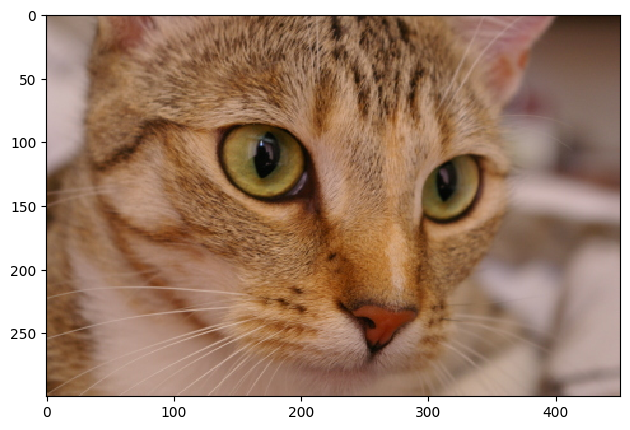

In [24]:
gato=skimage.data.cat()
print(type(gato))
print(gato.shape)
skimage.io.imshow(gato)
skimage.io.show()

In [25]:
#pasamos la imagen a gris.
imagen_gris = rgb2gray(gato)

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


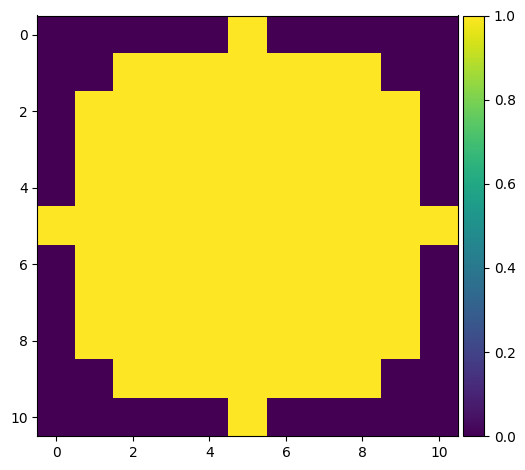

In [30]:
elemento_estructurante = disk(5)
skimage.io.imshow(elemento_estructurante)
skimage.io.show()

In [27]:
#operaciónes morfológica.
imagen_erosionada = erosion(imagen_gris, elemento_estructurante)
imagen_dilatada = dilation(imagen_gris, elemento_estructurante)
imagen_apertura = opening(imagen_gris, elemento_estructurante)
imagen_cierre = closing(imagen_gris, elemento_estructurante)

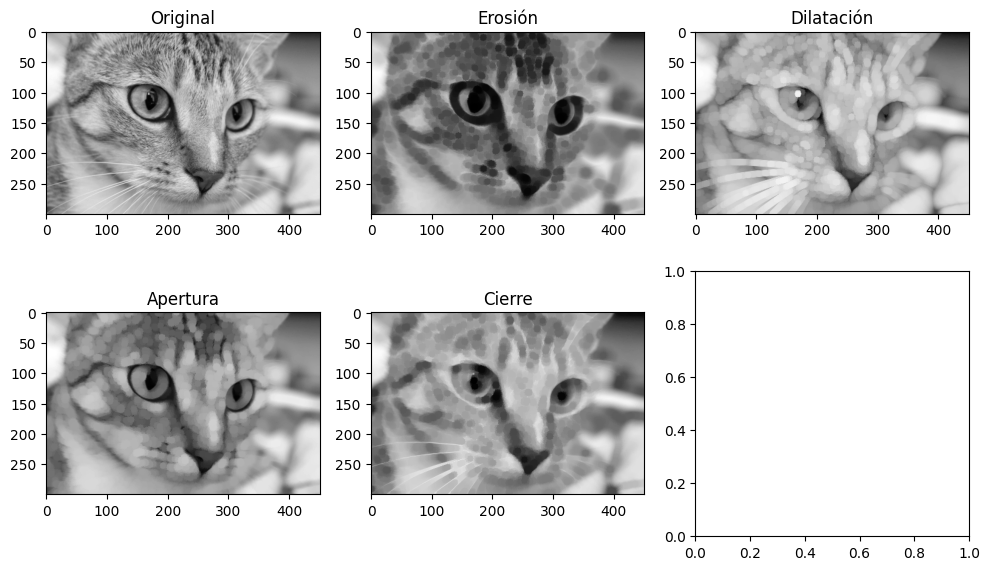

In [28]:
# Mostrar las imágenes originales y procesadas.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

axes[0, 0].imshow(imagen_gris, cmap='gray')
axes[0, 0].set_title('Original')

axes[0, 1].imshow(imagen_erosionada, cmap='gray')
axes[0, 1].set_title('Erosión')

axes[0, 2].imshow(imagen_dilatada, cmap='gray')
axes[0, 2].set_title('Dilatación')

axes[1, 0].imshow(imagen_apertura, cmap='gray')
axes[1, 0].set_title('Apertura')

axes[1, 1].imshow(imagen_cierre, cmap='gray')
axes[1, 1].set_title('Cierre')

fig.tight_layout()
plt.show()